# Functions

In [2]:
def loss_accuracy_graph (history, n_epochs):

  train_accuracy = history['accuracy']
  train_loss = history['loss']
  validation_accuracy = history['val_accuracy']
  validation_loss = history ['val_loss']

  fig, axes = plt.subplots (1,2, figsize = (15,5))

  axes[0].plot (train_accuracy, label = 'training')
  axes[0].plot (validation_accuracy, label = 'validation')
  axes[0].set_xlim (0, n_epochs)
  axes[0].legend (loc = 'lower right')
  axes[0].grid (True)
  axes[0].set_xlabel('Epoch')
  axes[0].set_ylabel('Accuracy')
  axes[0].set_title('Training and Validation Accuracy')

  axes[1].plot (train_loss, label = 'training')
  axes[1].plot (validation_loss, label = 'validation')
  axes[1].set_xlim (0, n_epochs)
  axes[1].legend (loc = 'upper right')
  axes[1].grid (True)
  axes[1].set_xlabel('Epoch')
  axes[1].set_ylabel('Loss')
  axes[1].set_title('Training and Validation Loss')

  plt.tight_layout()
  plt.show()

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred, title):

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = (16,10))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


In [4]:
import numpy as np 

def HSS (confusion_matrix):
    
    N = confusion_matrix.sum()
    TN = confusion_matrix[0, 0]
    TP = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    
    E = ((TP + FP)*(TP + FN) + (FN + TN)*(FP + TN)) / N
    
    HSS = (TP + TN - E) / (N - E)
    
    return HSS

In [5]:
def TSS (confusion_matrix):
    
    TN = confusion_matrix[0, 0]
    TP = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    
    TPR = TP / (TP+FN)
    TNR = TN / (TN+FP)
    
    TSS = (TPR + TNR) - 1
    
    return TSS

In [6]:
def correct_percentage (cat_count, count_correct): 
    
    x = round (count_correct[0]/cat_count[0] *100)
    m6 = round (count_correct[1]/cat_count[1] *100)
    m3 = round(count_correct[2]/cat_count[2] *100)
    c6 = round(count_correct[3]/cat_count[3] *100)
    m1 = round (count_correct[4]/cat_count[4] *100)
    c3 = round (count_correct[5]/cat_count[5] *100)
    c1 = round(count_correct[6]/cat_count[6] *100)
    
    percentage = [x, m6, m3, c6, m1, c3, c1]
    labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 
    
    print ('Percentage of correct predictions per category\n')
    
    for i in range (7):
        print ('{}: {}%'.format(labels[i],percentage[i]))

In [7]:
#loading everything in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test_us = pd.read_csv('test_us_fs.csv')
test_imb = pd.read_csv ('test_images_flarestrength.csv')

print ('Images in balanced set: {}'.format(len(test_us)))
print ('Images in imbalanced set: {}'.format (len(test_imb)))

Images in balanced set: 37596
Images in imbalanced set: 96700


# CLAHE CNN model

## Learning curve

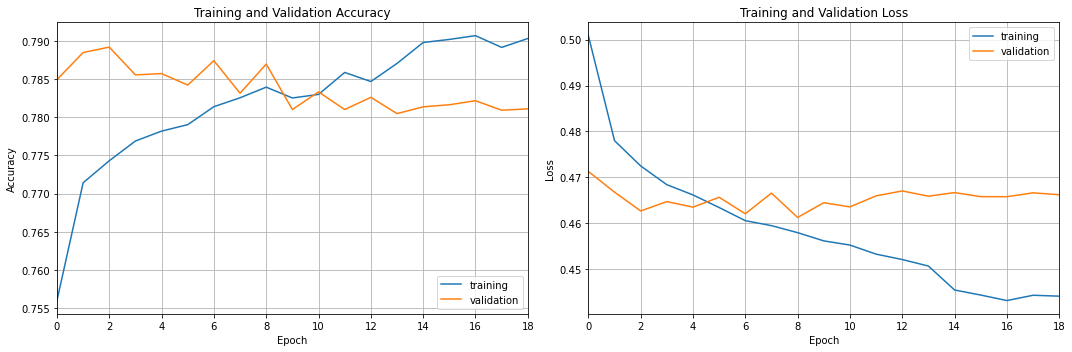

In [18]:
history_clahe = pd.read_csv('training_history_CNN_clahe.csv')

loss_accuracy_graph (history_clahe, 18)

In [24]:
print ('Max validation accuracy: {}'.format(round (history_clahe['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history_clahe['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history_clahe['val_accuracy'].std(), 3)))

Max validation accuracy: 0.79
Mean validation accuracy: 0.78
Standard deviation: 0.003


## Evaluation

In [8]:
test_pred = np.load('y_pred_cnn_clahe_b.npy')

In [9]:
#adding predicted values

test_imb['pred_class'] = test_pred

test_imb

,filename,class,AR_number,flare_strength,flare_category,pred_class
0,1820/1820_hmi.M_720s.20130821_091200_TAI.1.mag...,1,1820,C4.1,C3.1 - C6,1
1,1309/1309_hmi.M_720s.20111004_051200_TAI.1.mag...,0,1309,0,0,1
2,1203/1203_hmi.M_720s.20110501_103600_TAI.1.mag...,0,1203,0,0,0
3,1105/1105_hmi.M_720s.20100904_223600_TAI.1.mag...,0,1105,0,0,0
4,1180/1180_hmi.M_720s.20110331_012400_TAI.1.mag...,0,1180,0,0,0
...,...,...,...,...,...,...
96695,1825/1825_hmi.M_720s.20130819_144800_TAI.1.mag...,1,1825,C1.0,C1 - C3,1
96696,2266/2266_hmi.M_720s.20150122_124800_TAI.1.mag...,0,2266,0,0,0
96697,1775/1775_hmi.M_720s.20130621_054800_TAI.1.mag...,1,1775,C1.3,C1 - C3,1
96698,1260/1260_hmi.M_720s.20110729_034800_TAI.1.mag...,1,1260,C1.1,C1 - C3,1


In [11]:
# for a balanced test set

test_pred_b = np.load ('y_pred_cnn_clahe_us.npy')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true_b = test_us['class']

cm_b = confusion_matrix (y_true_b, test_pred_b)

class_rep = classification_report (y_true_b, test_pred_b)

print ('\033[1mCLASSIFICATION REPORT CLAHE CNN MODEL UNDERSAMPLED\033[0m')
print()
print (class_rep)

CLASSIFICATION REPORT CLAHE CNN MODEL UNDERSAMPLED

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     18798
           1       0.76      0.81      0.79     18798

    accuracy                           0.78     37596
   macro avg       0.78      0.78      0.78     37596
weighted avg       0.78      0.78      0.78     37596



In [40]:
print ('HSS: {}'.format (round (HSS (cm_b), 2)))
print ('TSS: {}'.format (round (TSS (cm_b), 2)))

HSS: 0.56
TSS: 0.56


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = test_imb['class']

cm = confusion_matrix (y_true, test_pred)

class_rep = classification_report (y_true, test_pred)

print ('\033[1mCLASSIFICATION REPORT CLAHE CNN MODEL\033[0m')
print()
print (class_rep)

CLASSIFICATION REPORT CLAHE CNN MODEL

              precision    recall  f1-score   support

           0       0.94      0.75      0.84     77902
           1       0.44      0.81      0.57     18798

    accuracy                           0.76     96700
   macro avg       0.69      0.78      0.70     96700
weighted avg       0.84      0.76      0.78     96700



In [11]:
print ('HSS: {}'.format (round (HSS (cm), 2)))
print ('TSS: {}'.format (round (TSS (cm), 2)))

HSS: 0.42
TSS: 0.56


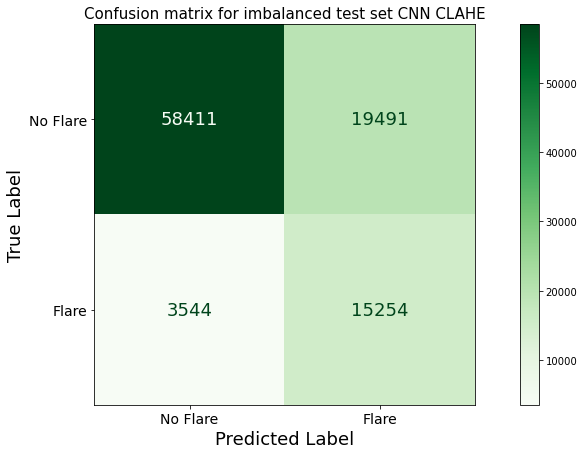

In [44]:
#these are plotted a bit bigger because they were hardly readable when lined up in Overleaf

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)


ax.set_title ('Confusion matrix for imbalanced test set CNN CLAHE', fontsize = 15)

plt.show()


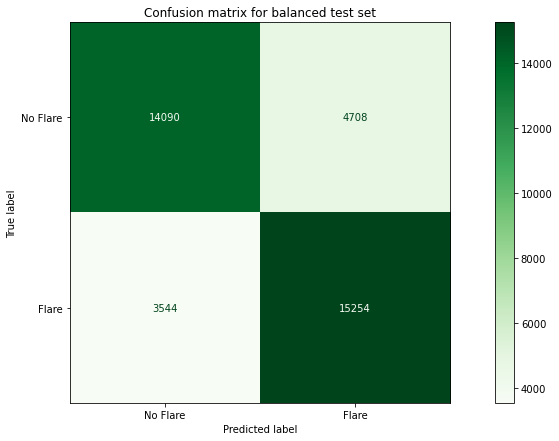

In [21]:


fig, ax = plt.subplots (1, figsize=(16,7))
display2 = ConfusionMatrixDisplay (cm_b, display_labels = ['No Flare', 'Flare'])
display2.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for balanced test set')

plt.show()

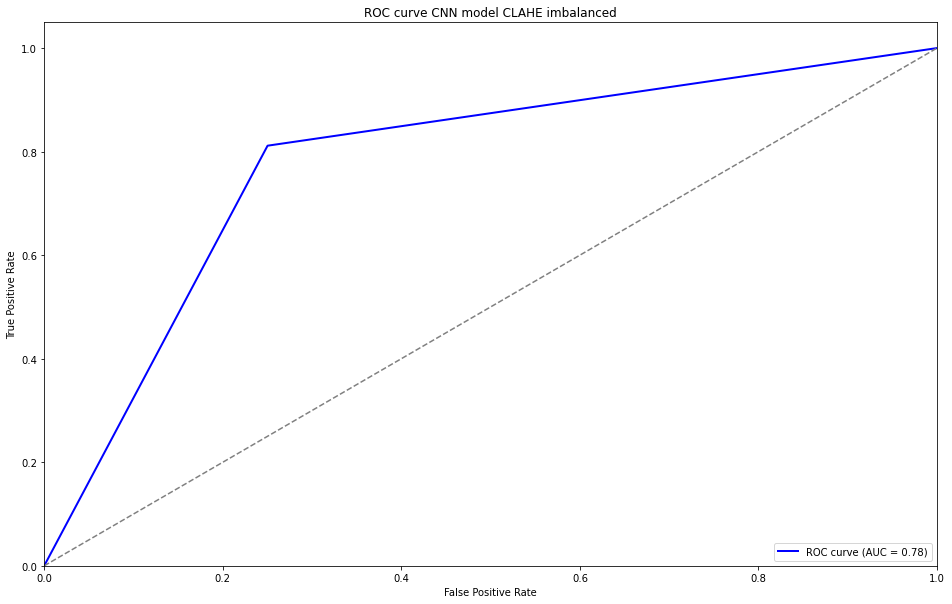

In [13]:
plot_roc_curve (y_true, test_pred, 'ROC curve CNN model CLAHE imbalanced')

## Error analysis

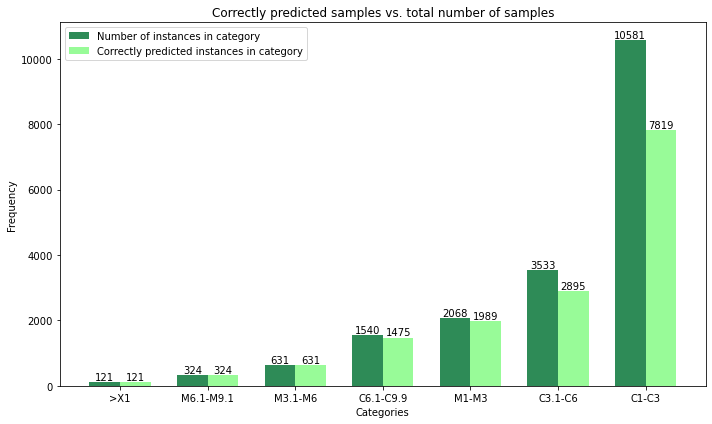

In [58]:
test_imb = pd.read_csv ('test_images_flarestrength.csv')

test_imb['pred_class'] = test_pred
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 100%
C6.1-C9.9: 96%
M1-M3: 96%
C3.1-C6: 82%
C1-C3: 74%


# CNN no CLAHE

## Learning curve

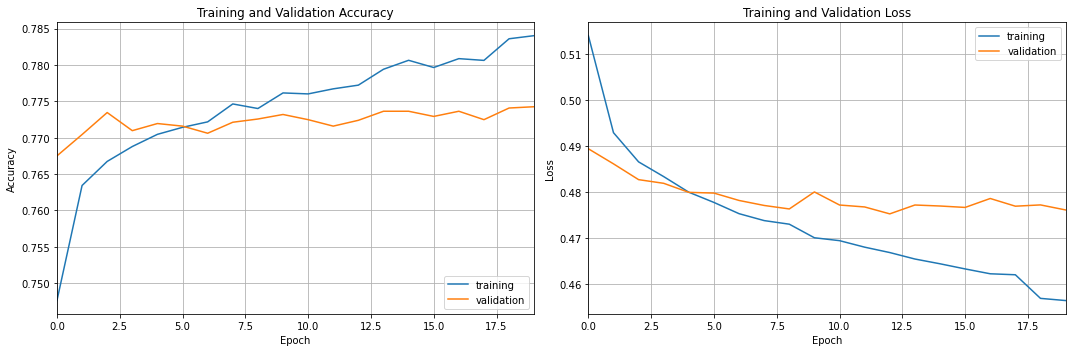

In [24]:
history = pd.read_csv('training_history_CNN.csv')

loss_accuracy_graph (history, 19)

In [27]:
print ('Max validation accuracy: {}'.format(round (history['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history['val_accuracy'].std(), 3)))

Max validation accuracy: 0.77
Mean validation accuracy: 0.77
Standard deviation: 0.002


In [19]:
test_pred_2 = np.load('y_pred_cnn_b.npy')

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = test_imb['class']

cm = confusion_matrix (y_true, test_pred_2)

class_rep = classification_report (y_true, test_pred_2)

print ('\033[1mCLASSIFICATION REPORT CNN MODEL IMBALANCED\033[0m')
print()
print (class_rep)

CLASSIFICATION REPORT CNN MODEL IMBALANCED

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     77902
           1       0.45      0.81      0.58     18798

    accuracy                           0.77     96700
   macro avg       0.70      0.78      0.71     96700
weighted avg       0.85      0.77      0.79     96700



In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_b_2 = np.load('y_pred_cnn_us.npy')
y_true_b = test_us['class']

cm_b = confusion_matrix (y_true_b, y_pred_b_2)

class_rep = classification_report (y_true_b, y_pred_b_2)

print ('\033[1mCLASSIFICATION REPORT CNN MODEL UNDERSAMPLED\033[0m')
print()
print (class_rep)

CLASSIFICATION REPORT CNN MODEL UNDERSAMPLED

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     18798
           1       0.77      0.81      0.79     18798

    accuracy                           0.78     37596
   macro avg       0.78      0.78      0.78     37596
weighted avg       0.78      0.78      0.78     37596



In [38]:
print ('HSS: {}'.format (round (HSS (cm_b), 2)))
print ('TSS: {}'.format (round (TSS (cm_b), 2)))

HSS: 0.57
TSS: 0.57


In [23]:
print ('HSS: {}'.format (round (HSS (cm), 2)))
print ('TSS: {}'.format (round (TSS (cm), 2)))

HSS: 0.44
TSS: 0.57


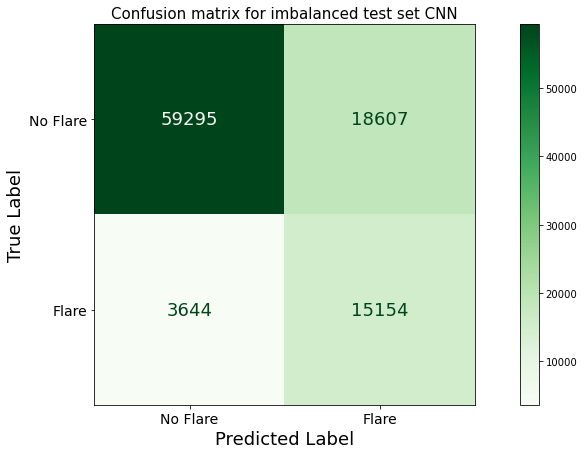

In [46]:
fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)

ax.set_title ('Confusion matrix for imbalanced test set CNN', fontsize = 15)

plt.show()

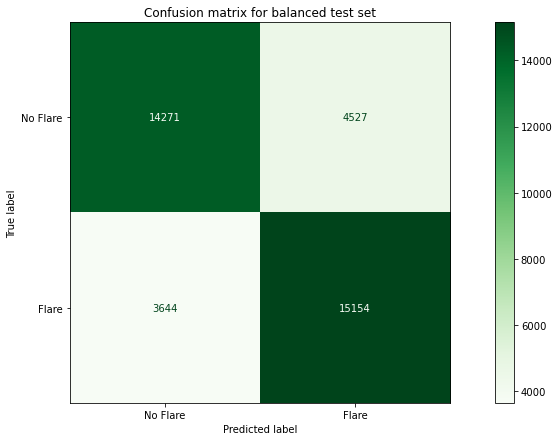

In [26]:


fig, ax = plt.subplots (1, figsize=(16,7))
display2 = ConfusionMatrixDisplay (cm_b, display_labels = ['No Flare', 'Flare'])
display2.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for balanced test set')

plt.show()

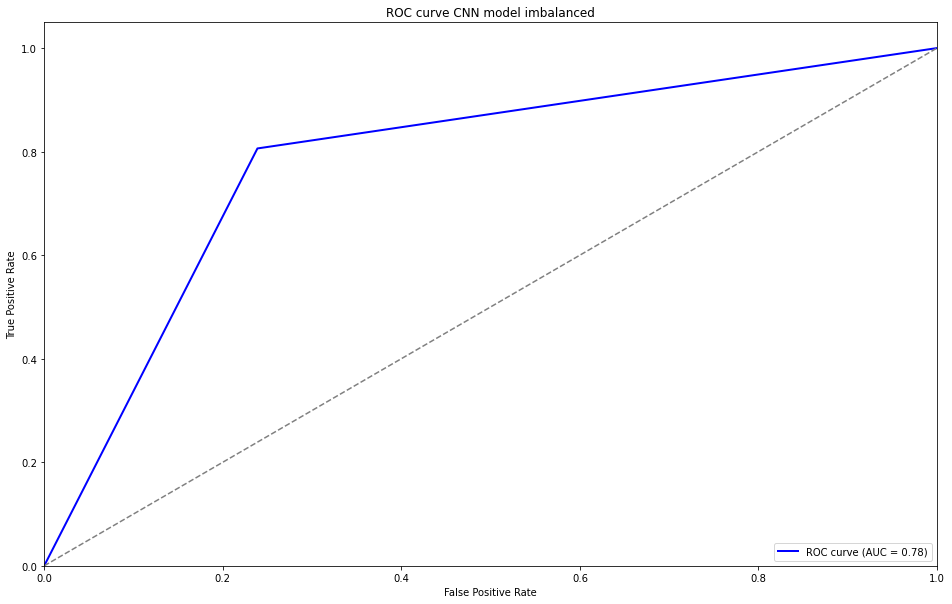

In [25]:
plot_roc_curve (y_true, test_pred_2, 'ROC curve CNN model imbalanced')

## Error analysis

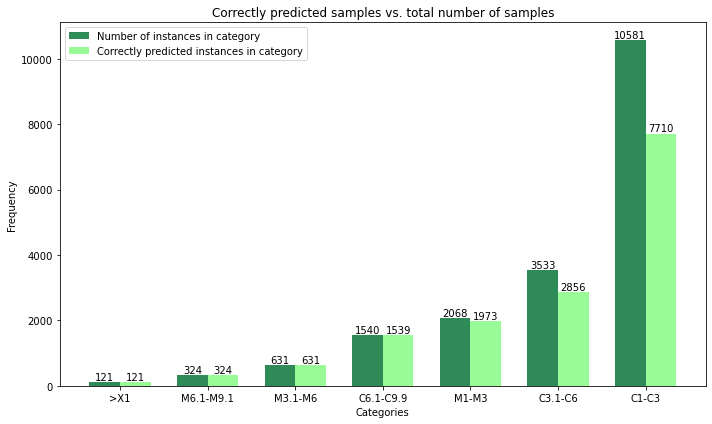

In [61]:
test_imb = pd.read_csv ('test_images_flarestrength.csv')

test_imb['pred_class'] = test_pred_2
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 100%
C6.1-C9.9: 100%
M1-M3: 95%
C3.1-C6: 81%
C1-C3: 73%


# CNN median filter

In [26]:
cnn_pred_med = np.load('y_pred_cnn_med_b.npy')
y_true = test_imb['class'].values

history_med_cnn = pd.read_csv ('training_history_cnn_med.csv')

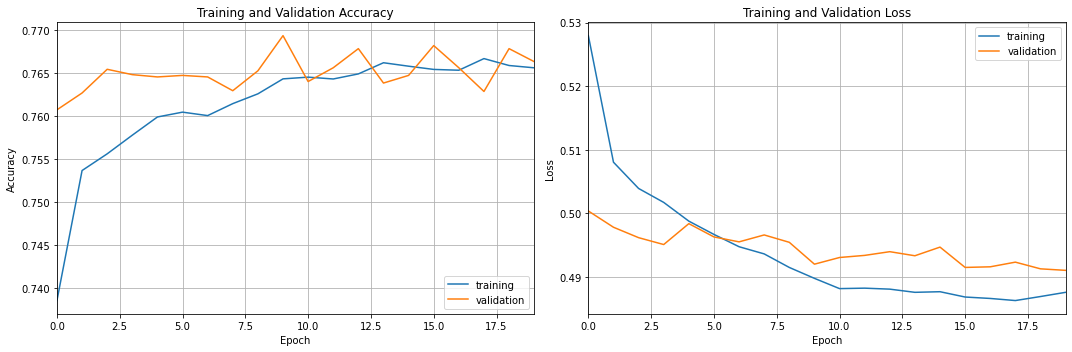

In [34]:
loss_accuracy_graph (history_med_cnn, 19)

In [77]:
print ('Max validation accuracy: {}'.format(round (history_med_cnn['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history_med_cnn['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history_med_cnn['val_accuracy'].std(), 3)))

Max validation accuracy: 0.77
Mean validation accuracy: 0.77
Standard deviation: 0.002


## TSS/HSS/ROC Curve/Confusion Matrix/Class report

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

class_rep = classification_report (y_true, cnn_pred_med)

cm_med_cnn = confusion_matrix (y_true, cnn_pred_med)

print ('\033[1mCLASSIFICATION REPORT CNN MODEL MEDIAN FILTER IMBALANCED\033[0m')
print ()
print (class_rep)

CLASSIFICATION REPORT CNN MODEL MEDIAN FILTER IMBALANCED

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     77902
           1       0.44      0.82      0.57     18798

    accuracy                           0.76     96700
   macro avg       0.69      0.78      0.70     96700
weighted avg       0.84      0.76      0.78     96700



In [47]:
cnn_med_us = np.load('y_pred_cnn_med_us.npy')
y_us = test_us['class'].values

class_rep_us = classification_report (y_us, cnn_med_us)

cm_med_us = confusion_matrix (y_us, cnn_med_us)

print ('\033[1mCLASSIFICATION REPORT CNN MODEL MEDIAN FILTER UNDERSAMPLED\033[0m')
print ()
print (class_rep_us)

CLASSIFICATION REPORT CNN MODEL MEDIAN FILTER UNDERSAMPLED

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     18798
           1       0.76      0.82      0.79     18798

    accuracy                           0.78     37596
   macro avg       0.78      0.78      0.78     37596
weighted avg       0.78      0.78      0.78     37596



In [23]:
print ('HSS: {}'.format (round (HSS (cm_med_us), 2)))
print ('TSS: {}'.format (round (TSS (cm_med_us), 2)))

HSS: 0.56
TSS: 0.56


In [37]:
print ('HSS: {}'.format (round (HSS (cm_med_cnn), 2)))
print ('TSS: {}'.format (round (TSS (cm_med_cnn), 2)))

HSS: 0.42
TSS: 0.56


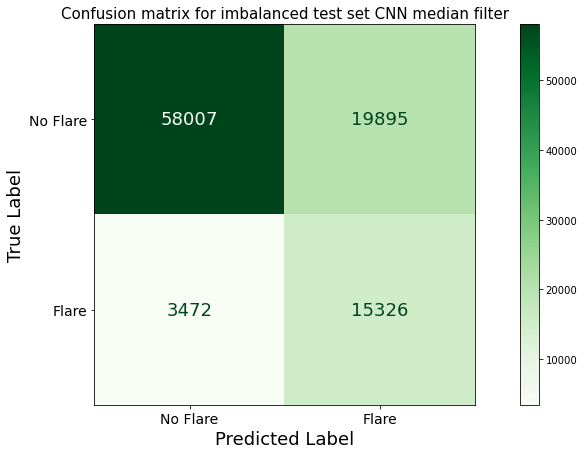

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_med_cnn, display_labels = ['No Flare', 'Flare'])
display.plot(cmap = 'Greens', ax = ax, values_format = 'd')
for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)



ax.set_title ('Confusion matrix for imbalanced test set CNN median filter', fontsize = 15)

plt.show()

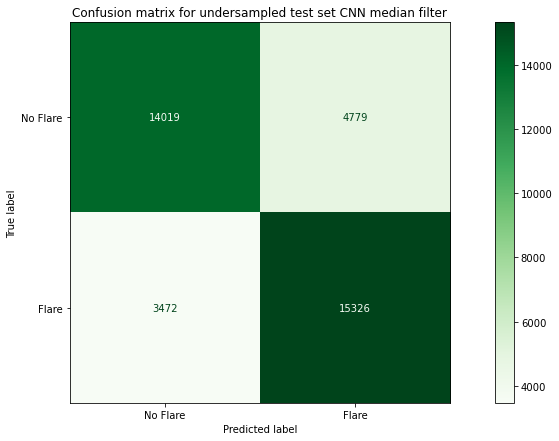

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_med_us, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for undersampled test set CNN median filter')

plt.show()

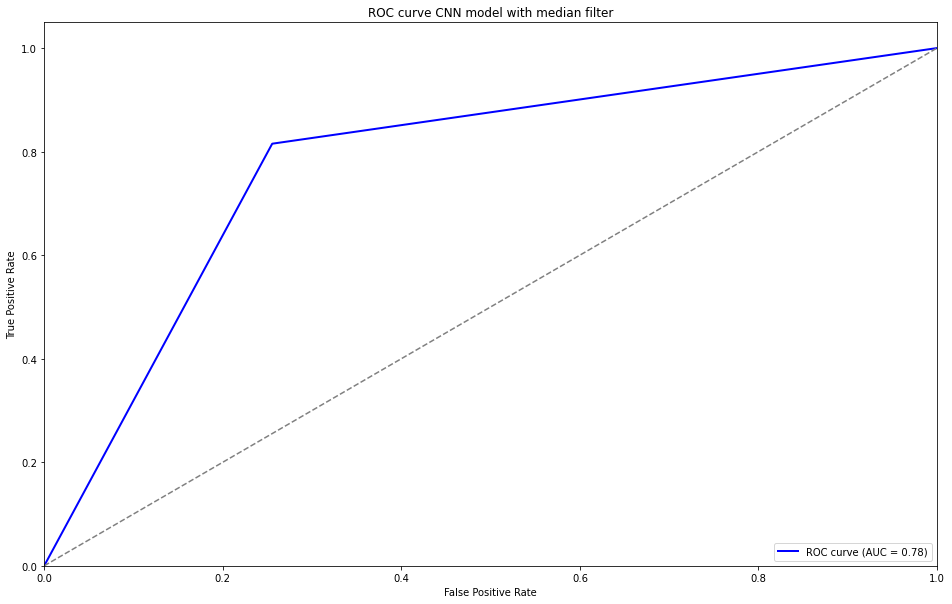

In [64]:
plot_roc_curve (y_true, cnn_pred_med, 'ROC curve CNN model with median filter')

## Error analysis

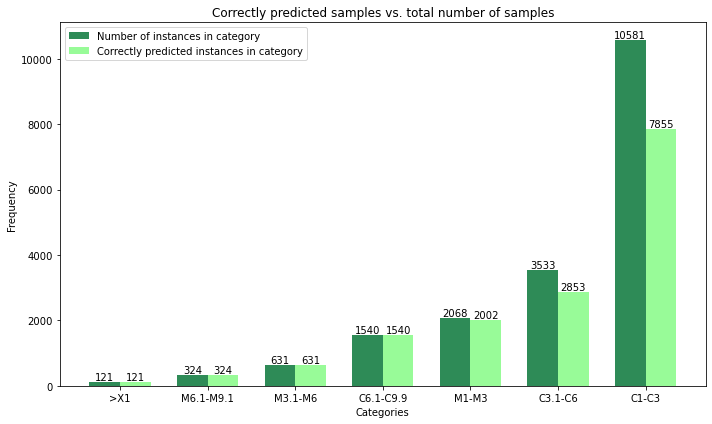

In [65]:
test_imb = pd.read_csv ('test_images_flarestrength.csv')

test_imb['pred_class'] = cnn_pred_med
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 100%
C6.1-C9.9: 100%
M1-M3: 97%
C3.1-C6: 81%
C1-C3: 74%


# ViT with CLAHE

## Learning curve

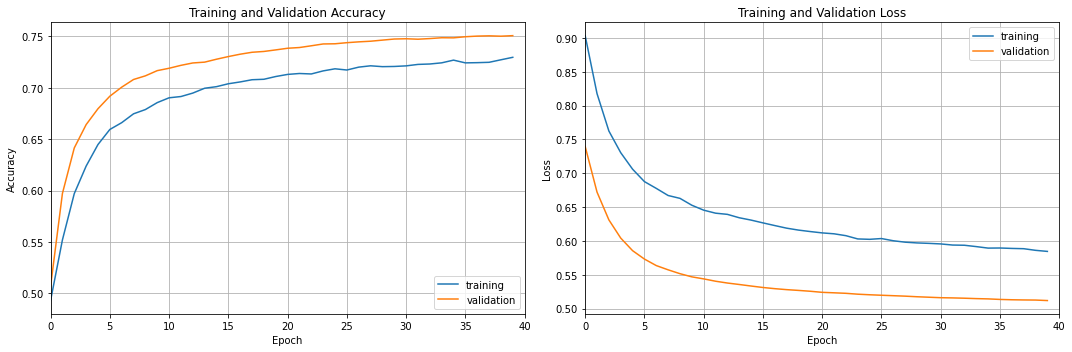

In [38]:
import matplotlib.pyplot as plt

history = pd.read_csv('history_clahe_ViT.csv')

loss_accuracy_graph (history, 40)

In [19]:
print ('Max validation accuracy: {}'.format(round (history['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history['val_accuracy'].std(), 3)))

Max validation accuracy: 0.75
Mean validation accuracy: 0.72
Standard deviation: 0.047


## Classification report, confusion matrix and ROC curve

In [30]:
import numpy as np

vit_pred = np.load ('y_pred_ViT_clahe_b.npy')

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = test_imb['class']

cm_vit = confusion_matrix (y_true, vit_pred)

class_rep = classification_report (y_true, vit_pred)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL CLAHE IMBALANCED\033[0m')
print()
print (class_rep)

#TSS 0.5

CLASSIFICATION REPORT VIT MODEL CLAHE IMBALANCED

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     77902
           1       0.41      0.75      0.53     18798

    accuracy                           0.74     96700
   macro avg       0.67      0.75      0.68     96700
weighted avg       0.83      0.74      0.77     96700



In [41]:
vit_pred_us = np.load('y_pred_vit_clahe_us.npy')

y_true = test_us['class']

cm_vit_us = confusion_matrix (y_true, vit_pred_us)

class_rep = classification_report (y_true, vit_pred_us)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL CLAHE BALANCED\033[0m')
print()
print (class_rep)

#TSS 0.49

CLASSIFICATION REPORT VIT MODEL CLAHE BALANCED

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     18798
           1       0.74      0.75      0.75     18798

    accuracy                           0.75     37596
   macro avg       0.75      0.75      0.75     37596
weighted avg       0.75      0.75      0.75     37596



In [42]:
print ('HSS: {}'.format (round (HSS (cm_vit_us), 2)))
print ('TSS: {}'.format (round (TSS (cm_vit_us), 2)))

HSS: 0.49
TSS: 0.49


In [78]:
print ('HSS: {}'.format (round (HSS (cm_vit), 2)))
print ('TSS: {}'.format (round (TSS (cm_vit), 2)))

HSS: 0.38
TSS: 0.49


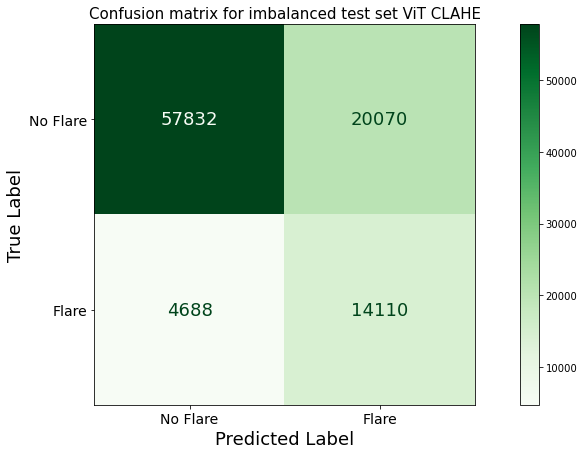

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_vit, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax, values_format = 'd')


for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)
ax.set_title ('Confusion matrix for imbalanced test set ViT CLAHE', fontsize = 15)

plt.show()

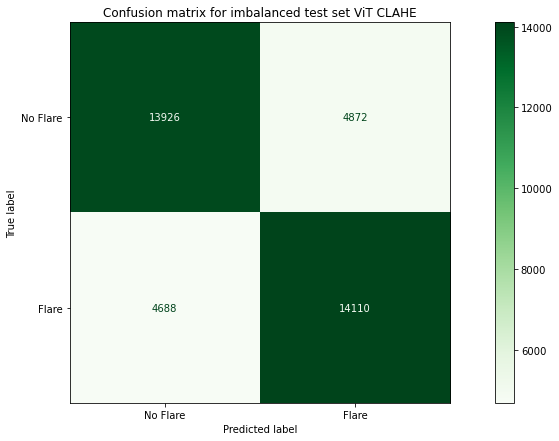

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_vit_us, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for imbalanced test set ViT CLAHE')

plt.show()

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred, title):

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = (16,10))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


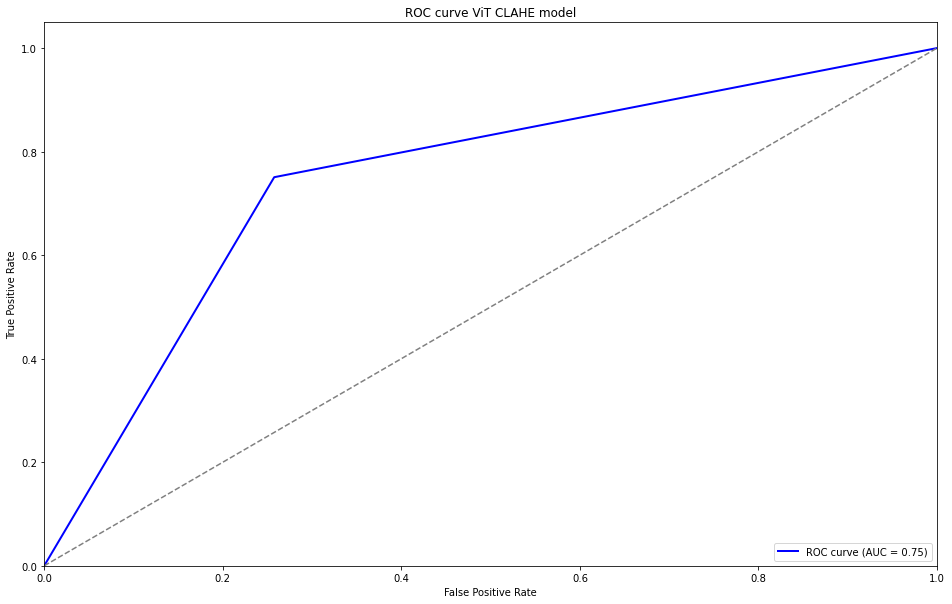

In [82]:
plot_roc_curve (y_true, vit_pred, 'ROC curve ViT CLAHE model')

## Error analysis

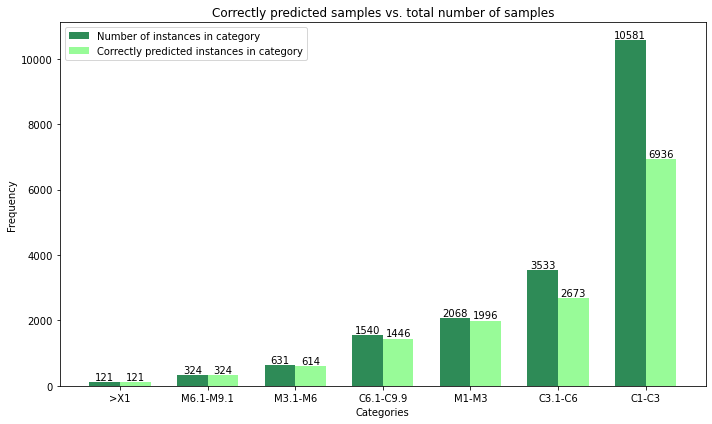

In [83]:
#adding predicted values
test_imb = pd.read_csv ('test_images_flarestrength.csv')

test_imb['pred_class'] = vit_pred
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 97%
C6.1-C9.9: 94%
M1-M3: 97%
C3.1-C6: 76%
C1-C3: 66%


# ViT no CLAHE

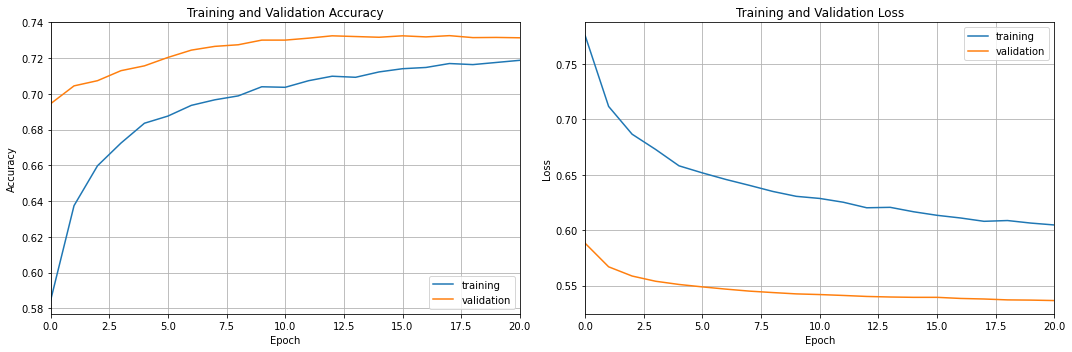

In [43]:
import matplotlib.pyplot as plt

history = pd.read_csv('history_ViT.csv')

loss_accuracy_graph (history, 20)

In [23]:
print ('Max validation accuracy: {}'.format(round (history['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history['val_accuracy'].std(), 3)))

Max validation accuracy: 0.73
Mean validation accuracy: 0.72
Standard deviation: 0.011


In [34]:
import numpy as np

vit_pred = np.load ('y_pred_ViT_b.npy')

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = test_imb['class']

cm_vit = confusion_matrix (y_true, vit_pred)

class_rep = classification_report (y_true, vit_pred)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL IMBALANCED\033[0m')
print()
print (class_rep)

#TSS 0.51

CLASSIFICATION REPORT VIT MODEL IMBALANCED

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     77902
           1       0.41      0.76      0.54     18798

    accuracy                           0.74     96700
   macro avg       0.67      0.75      0.68     96700
weighted avg       0.83      0.74      0.77     96700



In [43]:
vit_pred_us = np.load('y_pred_vit_us.npy')

y_true = test_us['class']

cm_vit_us = confusion_matrix (y_true, vit_pred_us)

class_rep = classification_report (y_true, vit_pred_us)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL CLAHE BALANCED\033[0m')
print()
print (class_rep)

#TSS 0.5

CLASSIFICATION REPORT VIT MODEL CLAHE BALANCED

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     18798
           1       0.75      0.76      0.76     18798

    accuracy                           0.75     37596
   macro avg       0.75      0.75      0.75     37596
weighted avg       0.75      0.75      0.75     37596



In [44]:
print ('HSS: {}'.format (round (HSS (cm_vit_us), 2)))
print ('TSS: {}'.format (round (TSS (cm_vit_us), 2)))

HSS: 0.51
TSS: 0.51


In [70]:
print ('HSS: {}'.format (round (HSS (cm_vit), 2)))
print ('TSS: {}'.format (round (TSS (cm_vit), 2)))

HSS: 0.38
TSS: 0.5


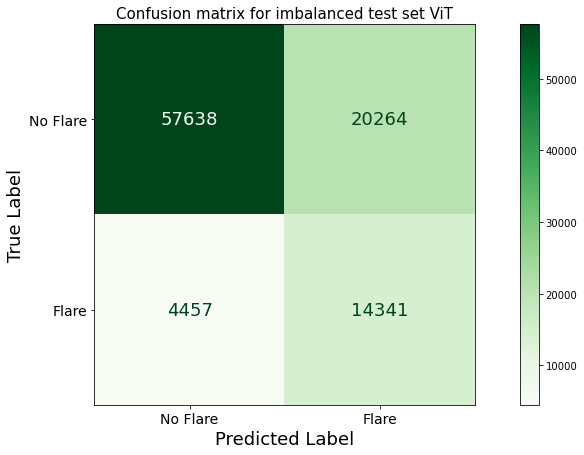

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_vit, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax, values_format = 'd')


for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)

ax.set_title ('Confusion matrix for imbalanced test set ViT', fontsize = 15)

plt.show()

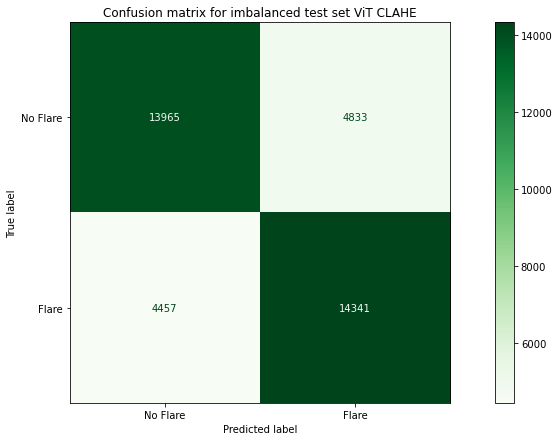

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_vit_us, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for imbalanced test set ViT CLAHE')

plt.show()

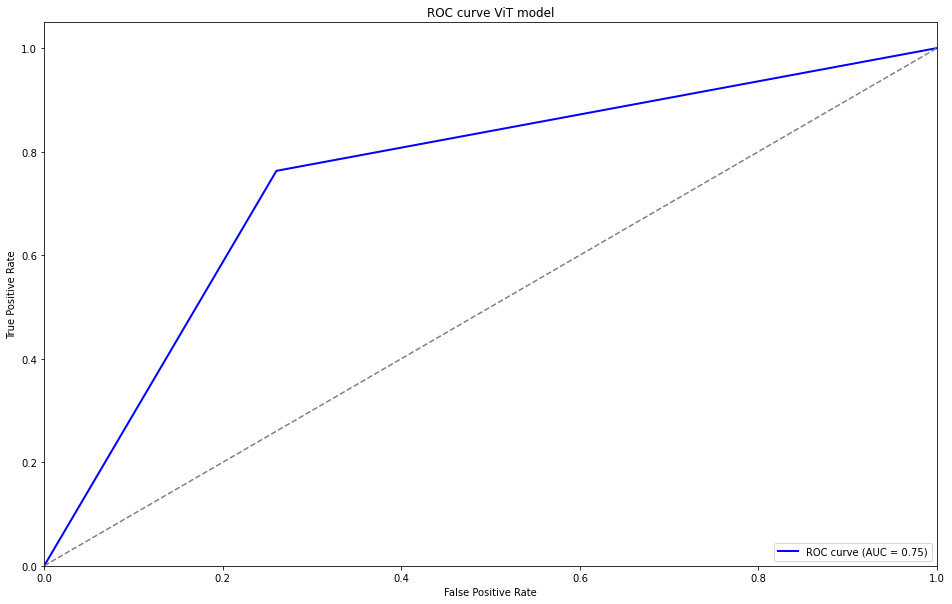

In [72]:
plot_roc_curve (y_true, vit_pred, 'ROC curve ViT model')

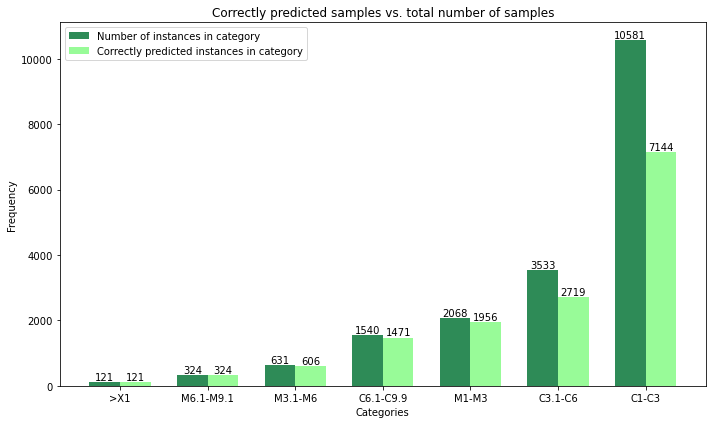

In [73]:
#adding predicted values
test_imb = pd.read_csv ('test_images_flarestrength.csv')

test_imb['pred_class'] = vit_pred
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [74]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 96%
C6.1-C9.9: 96%
M1-M3: 95%
C3.1-C6: 77%
C1-C3: 68%


# ViT median filter

## Learning curve

In [39]:
vit_pred_med = np.load('y_pred_ViT_med_b.npy')
y_true = test_imb['class'].values

history_med_vit = pd.read_csv ('history_ViT_med.csv')

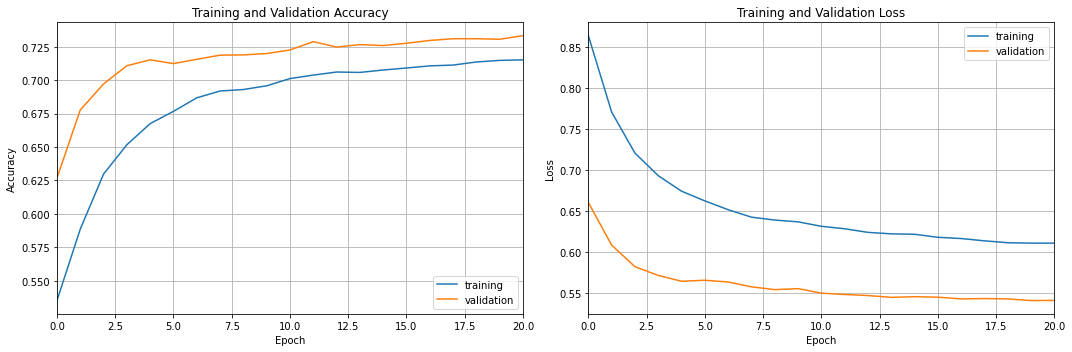

In [47]:
loss_accuracy_graph (history_med_vit, 20)

In [53]:
print ('Max validation accuracy: {}'.format(round (history_med_vit['val_accuracy'].max(), 2)))
print ('Mean validation accuracy: {}'.format(round (history_med_vit['val_accuracy'].mean(), 2)))
print ('Standard deviation: {}'.format (round(history_med_vit['val_accuracy'].std(), 3)))

Max validation accuracy: 0.73
Mean validation accuracy: 0.72
Standard deviation: 0.024


## Confusion matrix, ROC curve, HSS/TSS

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

class_rep = classification_report (y_true, vit_pred_med)

cm_med_vit = confusion_matrix (y_true, vit_pred_med)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL MEDIAN FILTER IMBALANCED\033[0m')
print ()
print (class_rep)

CLASSIFICATION REPORT VIT MODEL MEDIAN FILTER IMBALANCED

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     77902
           1       0.40      0.75      0.52     18798

    accuracy                           0.73     96700
   macro avg       0.66      0.74      0.67     96700
weighted avg       0.82      0.73      0.76     96700



In [45]:
vit_med_us = np.load('y_pred_vit_med_us.npy')
y_us = test_us['class'].values

class_rep_us = classification_report (y_us, vit_med_us)

cm_med_us = confusion_matrix (y_us, vit_med_us)

print ('\033[1mCLASSIFICATION REPORT VIT MODEL MEDIAN FILTER UNDERSAMPLED\033[0m')
print ()
print (class_rep_us)

CLASSIFICATION REPORT VIT MODEL MEDIAN FILTER UNDERSAMPLED

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     18798
           1       0.73      0.75      0.74     18798

    accuracy                           0.74     37596
   macro avg       0.74      0.74      0.74     37596
weighted avg       0.74      0.74      0.74     37596



In [46]:
print ('HSS: {}'.format (round (HSS (cm_med_us), 2)))
print ('TSS: {}'.format (round (TSS (cm_med_us), 2)))

HSS: 0.48
TSS: 0.48


In [7]:
print ('HSS: {}'.format (round (HSS (cm_med_vit), 2)))
print ('TSS: {}'.format (round (TSS (cm_med_vit), 2)))

HSS: 0.36
TSS: 0.48


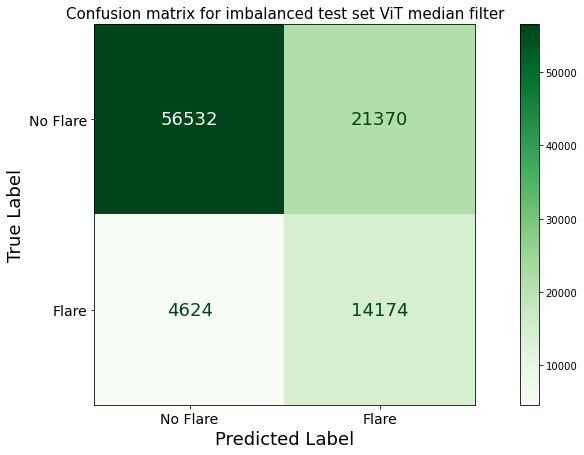

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_med_vit, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax, values_format = 'd')

for text in display.ax_.texts:
    text.set_fontsize(18)  
    
plt.tick_params(axis='both', which='major', labelsize=14) 
ax.set_xlabel('Predicted Label', fontsize=18)  
ax.set_ylabel('True Label', fontsize=18)

ax.set_title ('Confusion matrix for imbalanced test set ViT median filter', fontsize = 15)

plt.show()

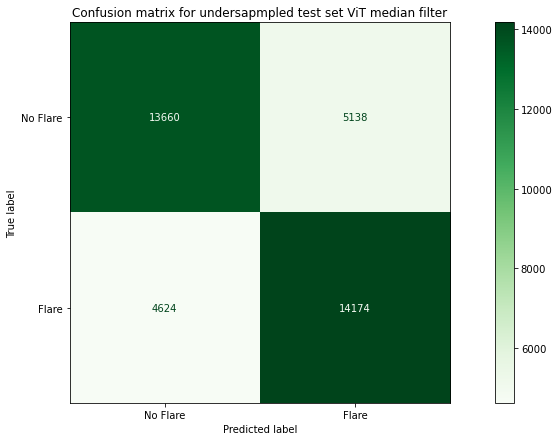

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (1, figsize=(16,7))

display = ConfusionMatrixDisplay (cm_med_us, display_labels = ['No Flare', 'Flare'])

display.plot(cmap = 'Greens', ax = ax)

ax.set_title ('Confusion matrix for undersapmpled test set ViT median filter')

plt.show()

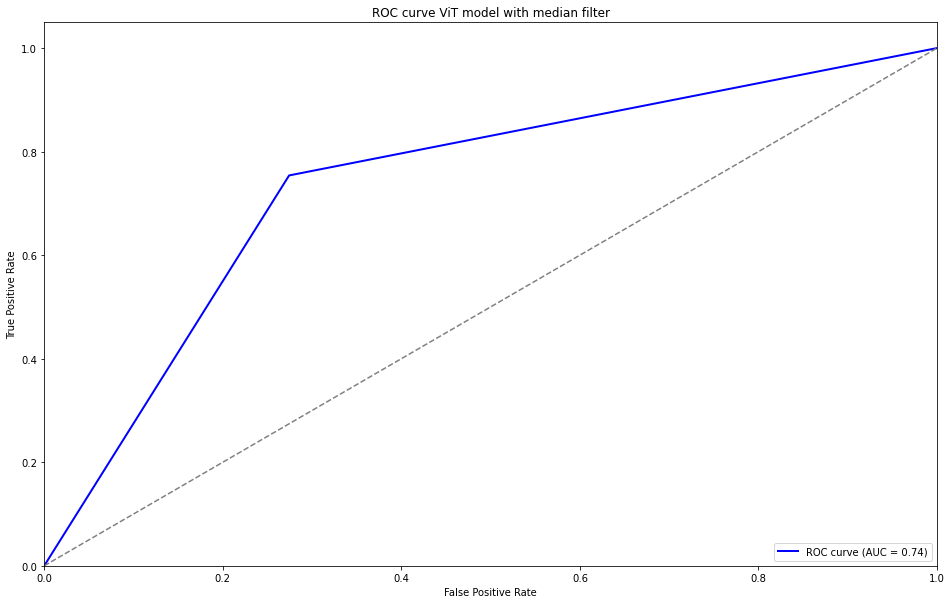

In [12]:
plot_roc_curve (y_true, vit_pred_med, 'ROC curve ViT model with median filter')

## Error analysis

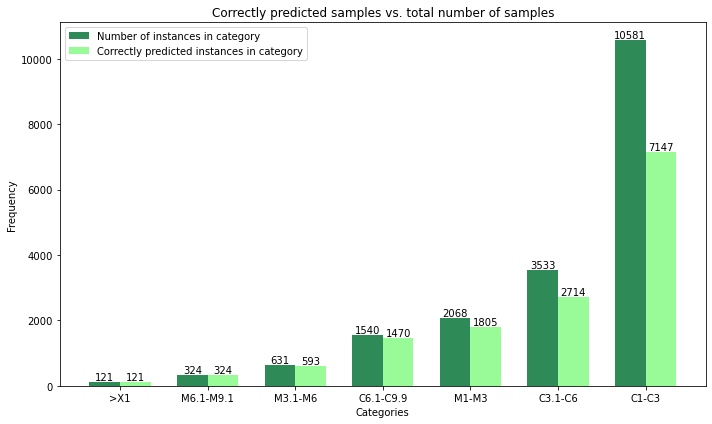

In [13]:
test_imb['pred_class'] = vit_pred_med
test_imb = test_imb.drop(test_imb[test_imb['class'] == 0].index)
test_imb['correct'] = (test_imb['class'] == 1) & (test_imb['pred_class'] == 1)

correctly_classified = test_imb[test_imb['correct']]
count_correct_by_category = correctly_classified.groupby('flare_category').size()
count_correct = count_correct_by_category.sort_values()

category_counts = test_imb['flare_category'].value_counts()
cat_count = category_counts.sort_values()

import matplotlib.pyplot as plt

labels = ['>X1', 'M6.1-M9.1', 'M3.1-M6', 'C6.1-C9.9', 'M1-M3', 'C3.1-C6', 'C1-C3'] 

bar_width = 0.35
x = np.arange (len(labels))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x, cat_count, width=bar_width, label='Number of instances in category', color='seagreen', align='center')
bars2 = plt.bar(x + bar_width, count_correct, width=bar_width, label='Correctly predicted instances in category', color='palegreen', align='center')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom') 

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Correctly predicted samples vs. total number of samples')
plt.xticks(x + bar_width / 2, labels)  
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
correct_percentage (cat_count, count_correct)

Percentage of correct predictions per category

>X1: 100%
M6.1-M9.1: 100%
M3.1-M6: 94%
C6.1-C9.9: 95%
M1-M3: 87%
C3.1-C6: 77%
C1-C3: 68%
